In [30]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [31]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import qiskit_aer
from qiskit_aer import Aer
from qiskit.circuit.library import GroverOperator,  MCXGate
backend = Aer.get_backend("qasm_simulator")
backend

QasmSimulator('qasm_simulator')

# **TWO QUBIT SIMULATION OF GROVERS ALGORITHM ON A CUSTOMIZED ORACLE**

In [32]:
def oracle_2():
  qc = QuantumCircuit(2)
  qc.x(1)
  qc.h(1)
  qc.cx(0,1)
  qc.h(1)
  qc.x(1)
  # qc = qc.to_gate(label = "Oracle for 10")
  return qc


In [33]:
def diffusion_op():
  qc = QuantumCircuit(2)
  # Diffusion operator (U_s)
  qc.h([0,1])
  qc.z([0,1])
  qc.cz(0,1)
  qc.h([0,1])
  return qc;

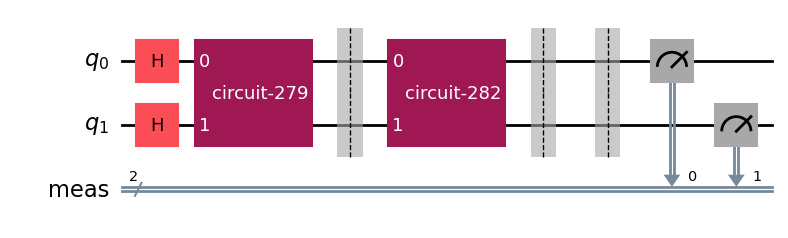

In [34]:
qc = QuantumCircuit(2)
qc.h(range(2))
qc.append(oracle_2().to_gate(),[0,1])
qc.barrier(0,1)
qc.append(diffusion_op().to_gate(),[0,1])
qc.barrier()
qc.measure_all()
qc.draw("mpl")



{'01': 1024}


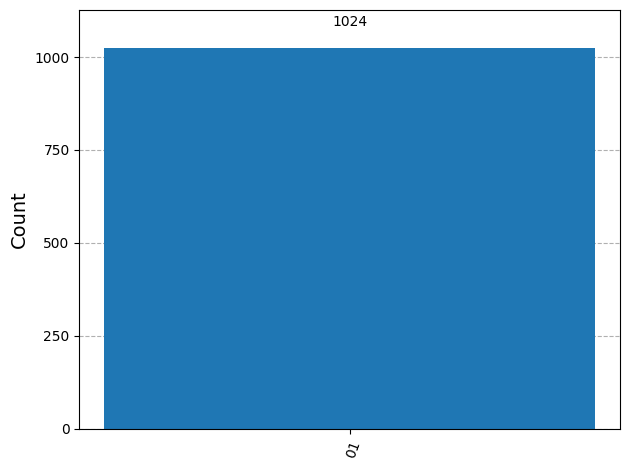

In [35]:
qc_t  =transpile(qc,backend)
job = backend.run(qc_t,shot = 1024)
job_result = job.result()
counts = job_result.get_counts()
hist = plot_histogram(counts)
print(counts)
hist

# **3 QUBITS GROVERS ALGORITHM SIMULATION**

In [72]:
def oracle_3():#for |101>
  qc = QuantumCircuit(3)
  qc.x(1)
  qc.h(2)
  qc.ccx(0,1,2)
  qc.h(2)
  qc.x(1)
  return qc


In [54]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h(range(nqubits))
    qc.x(range(nqubits))


    qc.h(nqubits-1)

    qc.mcx(list(range(nqubits - 1)), nqubits - 1) # multi-controlled-toffoli
    qc.h(nqubits-1)


    qc.x(range(nqubits))
    qc.h(range(nqubits))


    return qc

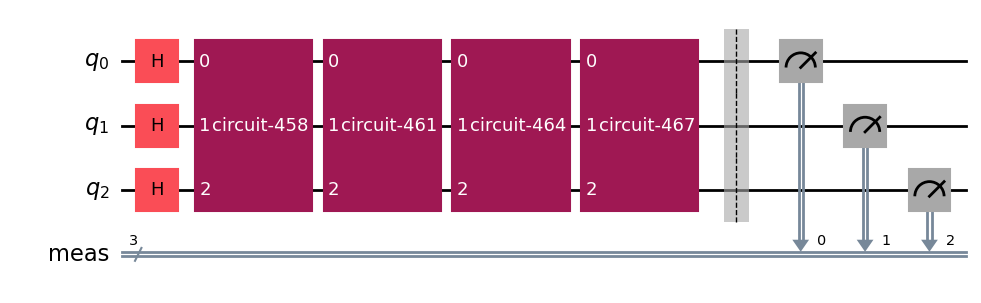

In [73]:
qc1 = QuantumCircuit(3)
qc1.h(range(3))
for i in range(2):#doing the algorithm for root 8 times or 2 times


  qc1.append(oracle_3().to_gate(),[0,1,2])
  qc1.append(diffuser(3).to_gate(),[0,1,2])
qc1.measure_all()
qc1.draw("mpl")





{'011': 8, '111': 6, '001': 4, '100': 11, '110': 9, '010': 11, '000': 3, '101': 972}


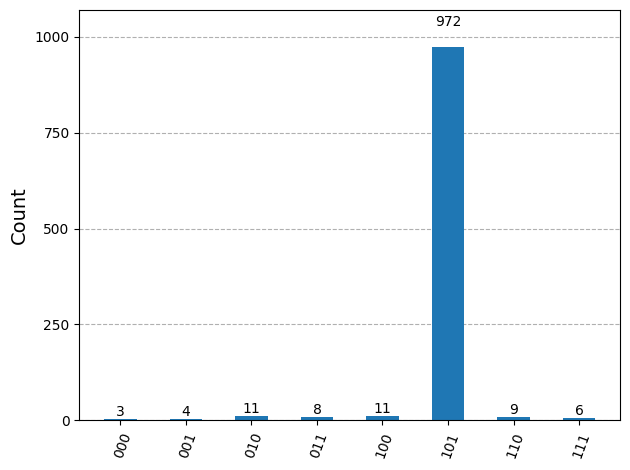

In [74]:
qc_t1  =transpile(qc1,backend)
job = backend.run(qc_t1,shot = 1024)
job_result = job.result()
counts = job_result.get_counts()
hist = plot_histogram(counts)
print(counts)
hist